In [ ]:
install.packages("readxl")
install.packages("openxlsx")
library("readxl")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Data Cleaning and Pre-processing

In [ ]:
data= read_excel("/content/Crime_Data_from_2020_to_Present.xlsx")
data$TIME_OCC=NULL
#Deleting column with numerical time data (it wasn't deleted on excel because it was needed to derive the needed column)
class(data)
dim(data)
#We have 743817 entries (rows) and 30 features (columns)
head(data)

[1] "tbl_df"     "tbl"        "data.frame"

[1] 743817     30

DR_NO,Date_rptd,Date_occ,Year_occ,Month_occ,Day_occ,Time_occ,Area,Area_name,Rpt_dist_no,⋯,Status,Status_desc,Crm_cd1,Crm_cd2,Crm_cd3,Crm_cd4,Location,Cross_street,Lat,Lon
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>
10304468,2020-01-08,2020-01-08,2020,Jan,Wed,1899-12-31 22:30:00,3,Southwest,377,⋯,AO,Adult Other,624,NA,NA,NA,1100 W 39TH PL,NA,34.0141,-118.2978
190101086,2020-01-02,2020-01-01,2020,Jan,Wed,1899-12-31 03:30:00,1,Central,163,⋯,IC,Invest Cont,624,NA,NA,NA,700 S HILL ST,NA,34.0459,-118.2545
200110444,2020-04-14,2020-02-13,2020,Feb,Thu,1899-12-31 12:00:00,1,Central,155,⋯,AA,Adult Arrest,845,NA,NA,NA,200 E 6TH ST,NA,34.0448,-118.2474
191501505,2020-01-01,2020-01-01,2020,Jan,Wed,1899-12-31 17:30:00,15,N Hollywood,1543,⋯,IC,Invest Cont,745,998,NA,NA,5400 CORTEEN PL,NA,34.1685,-118.4019
191921269,2020-01-01,2020-01-01,2020,Jan,Wed,1899-12-31 04:15:00,19,Mission,1998,⋯,IC,Invest Cont,740,NA,NA,NA,14400 TITUS ST,NA,34.2198,-118.4468
200100501,2020-01-02,2020-01-01,2020,Jan,Wed,NA,1,Central,163,⋯,IC,Invest Cont,121,998,NA,NA,700 S BROADWAY,NA,34.0452,-118.2534


In [ ]:
#Checking for duplicate rows
duplicates= data[duplicated(data), ]
if (nrow(duplicates) > 0) {
  print("There are duplicate rows in the dataset.")
} else {
  print("No duplicate rows found in the dataset.")
}

[1] "No duplicate rows found in the dataset."


In [ ]:
#Converting time column into time format with the hms library
library(hms)
data$Time_occ=as_hms(data$Time_occ)
head(data)

DR_NO,Date_rptd,Date_occ,Year_occ,Month_occ,Day_occ,Time_occ,Area,Area_name,Rpt_dist_no,⋯,Status,Status_desc,Crm_cd1,Crm_cd2,Crm_cd3,Crm_cd4,Location,Cross_street,Lat,Lon
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<time>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>
10304468,2020-01-08,2020-01-08,2020,Jan,Wed,22:30:00,3,Southwest,377,⋯,AO,Adult Other,624,NA,NA,NA,1100 W 39TH PL,NA,34.0141,-118.2978
190101086,2020-01-02,2020-01-01,2020,Jan,Wed,03:30:00,1,Central,163,⋯,IC,Invest Cont,624,NA,NA,NA,700 S HILL ST,NA,34.0459,-118.2545
200110444,2020-04-14,2020-02-13,2020,Feb,Thu,12:00:00,1,Central,155,⋯,AA,Adult Arrest,845,NA,NA,NA,200 E 6TH ST,NA,34.0448,-118.2474
191501505,2020-01-01,2020-01-01,2020,Jan,Wed,17:30:00,15,N Hollywood,1543,⋯,IC,Invest Cont,745,998,NA,NA,5400 CORTEEN PL,NA,34.1685,-118.4019
191921269,2020-01-01,2020-01-01,2020,Jan,Wed,04:15:00,19,Mission,1998,⋯,IC,Invest Cont,740,NA,NA,NA,14400 TITUS ST,NA,34.2198,-118.4468
200100501,2020-01-02,2020-01-01,2020,Jan,Wed,NA,1,Central,163,⋯,IC,Invest Cont,121,998,NA,NA,700 S BROADWAY,NA,34.0452,-118.2534


In [ ]:
#Trimming the values of the Location column so that the spaces are reduced to one space between each term
data$Location= gsub("\\s+", " ", data$Location)
print(data$Location[1:10])

 [1] "1100 W 39TH PL"    "700 S HILL ST"     "200 E 6TH ST"     
 [4] "5400 CORTEEN PL"   "14400 TITUS ST"    "700 S BROADWAY"   
 [7] "700 S FIGUEROA ST" "200 E 6TH ST"      "700 BERNARD ST"   
[10] "11900 BALBOA BL"  


In [ ]:
sum(is.na(data))
#We have many null values that we need to deal with according to each feature

[1] 4097182

In [ ]:
#Creating a df that shows which columns have null values and the number of null values in each
null_df= data.frame(
Col_name=names(data),
Number_of_nulls = colSums(is.na(data))
)
null_df=subset(null_df, Number_of_nulls>0)
null_df

,Col_name,Number_of_nulls
,<chr>,<dbl>
Time_occ,Time_occ,30852
Mocode,Mocode,102024
Vict_sex,Vict_sex,97040
Vict_descent,Vict_descent,97046
Premis_desc,Premis_desc,424
Weapon_used_cd,Weapon_used_cd,485624
Weapon_desc,Weapon_desc,485624
Crm_cd1,Crm_cd1,9
Crm_cd2,Crm_cd2,688731


Now we will deal with the null values in each column adequately

In [ ]:
#Deleting Crm_cd2,3,4 and Cross Street columns because most of the values in them are nulls
data <- data %>% select(-Crm_cd2, -Crm_cd3, -Crm_cd4, -Cross_street)


In [ ]:
#Remaining column nulls
null_df= data.frame(
Col_name= names(data),
Number_of_nulls = colSums(is.na(data))
)
null_df=subset(null_df, Number_of_nulls>0)
null_df

,Col_name,Number_of_nulls
,<chr>,<dbl>
Time_occ,Time_occ,30852
Mocode,Mocode,102024
Vict_sex,Vict_sex,97040
Vict_descent,Vict_descent,97046
Premis_desc,Premis_desc,424
Weapon_used_cd,Weapon_used_cd,485624
Weapon_desc,Weapon_desc,485624
Crm_cd1,Crm_cd1,9


Warning message:
“Removed 30852 rows containing non-finite values (`stat_count()`).”


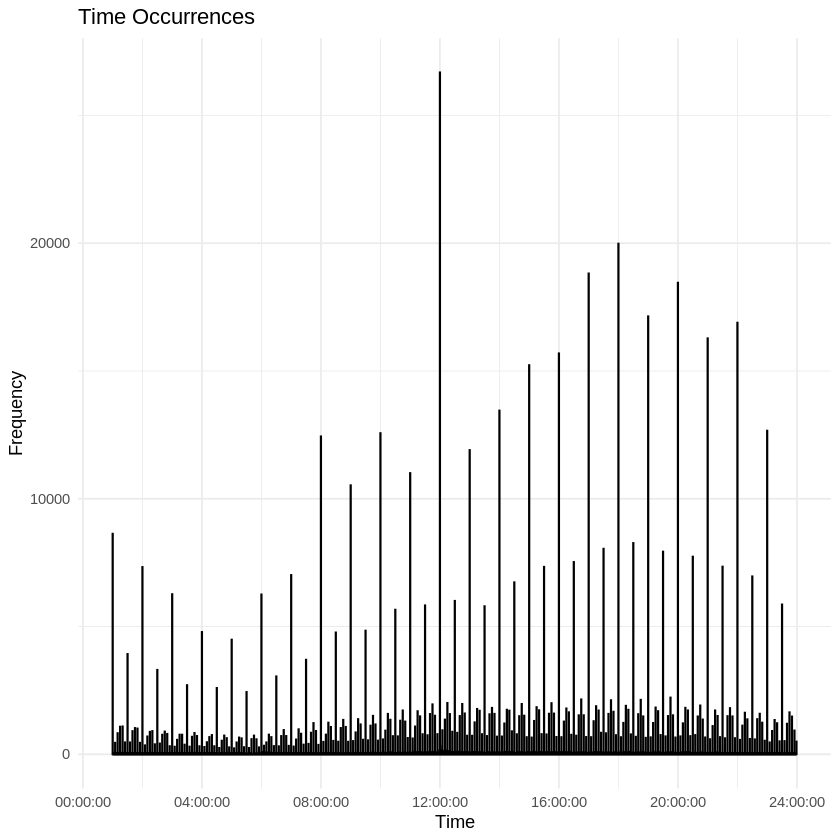

In [ ]:
#Visualizing the time value occurrences to decide which statistical value to use to replace nulls
library(ggplot2)
ggplot(data, aes(x = Time_occ)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Time Occurrences", x = "Time", y = "Frequency") +
  theme_minimal()

The distribution is skewed. will use the median time.

In [ ]:
#Replacing nulls in the Time_occ column with the median time
data$Time_occ[is.na(data$Time_occ)]= median(data$Time_occ,na.rm = TRUE)
sum(is.na(data$Time_occ))
head(data,20)

[1] 0

DR_NO,Date_rptd,Date_occ,Year_occ,Month_occ,Day_occ,Time_occ,Area,Area_name,Rpt_dist_no,⋯,Vict_descent,Premis_desc,Weapon_used_cd,Weapon_desc,Status,Status_desc,Crm_cd1,Location,Lat,Lon
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<time>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
10304468,2020-01-08,2020-01-08,2020,Jan,Wed,22:30:00,3,Southwest,377,⋯,B,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978
190101086,2020-01-02,2020-01-01,2020,Jan,Wed,03:30:00,1,Central,163,⋯,H,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545
200110444,2020-04-14,2020-02-13,2020,Feb,Thu,12:00:00,1,Central,155,⋯,X,POLICE FACILITY,NA,NA,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474
191501505,2020-01-01,2020-01-01,2020,Jan,Wed,17:30:00,15,N Hollywood,1543,⋯,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NA,NA,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019
191921269,2020-01-01,2020-01-01,2020,Jan,Wed,04:15:00,19,Mission,1998,⋯,X,BEAUTY SUPPLY STORE,NA,NA,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468
200100501,2020-01-02,2020-01-01,2020,Jan,Wed,14:45:00,1,Central,163,⋯,H,NIGHT CLUB (OPEN EVENINGS ONLY),500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,121,700 S BROADWAY,34.0452,-118.2534
200100502,2020-01-02,2020-01-02,2020,Jan,Thu,13:15:00,1,Central,161,⋯,H,DEPARTMENT STORE,NA,NA,IC,Invest Cont,442,700 S FIGUEROA ST,34.0483,-118.2631
200100504,2020-01-04,2020-01-04,2020,Jan,Sat,14:45:00,1,Central,155,⋯,X,POLICE FACILITY,NA,NA,IC,Invest Cont,946,200 E 6TH ST,34.0448,-118.2474
200100507,2020-01-04,2020-01-04,2020,Jan,Sat,02:00:00,1,Central,101,⋯,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NA,NA,IC,Invest Cont,341,700 BERNARD ST,34.0677,-118.2398


In [ ]:
#Replacing nulls in the following columns with the string "unknown" as to not create bias in the data if the mode was used
data$Mocode[is.na(data$Mocode)]= "unknown"
data$Vict_sex[is.na(data$Vict_sex)]= "unknown"
data$Vict_descent[is.na(data$Vict_descent)]= "unknown"
data$Premis_desc[is.na(data$Premis_desc)]= "unknown"
data$Weapon_desc[is.na(data$Weapon_desc)]= "unknown"
#Replacing Weapon_desc with 0 to preserve the numeric nature of the column
data$Weapon_used_cd[is.na(data$Weapon_used_cd)]= 0


In [ ]:
#Replacing null values in the age column with the mean of the ages
mean_age= mean(data$Vict_age[data$Vict_age!= 0], na.rm=TRUE)
data$Vict_age[data$Vict_age== 0]= mean_age
unique(data$Vict_age)
#Rounding decimal values to 0 decimal places
data$Vict_age= ifelse(data$Vict_age %% 1 != 0,round(data$Vict_age, 0),data$Vict_age)
unique(data$Vict_age)
head(data,5)

[1]  36.00000  25.00000  39.56342  76.00000  31.00000  23.00000  29.00000
  [8]  35.00000  41.00000  24.00000  34.00000  46.00000  66.00000  40.00000
 [15]  27.00000  62.00000  43.00000  71.00000  50.00000  19.00000  51.00000
 [22]  33.00000  69.00000  39.00000  57.00000  78.00000  52.00000  38.00000
 [29]  55.00000  44.00000  18.00000  54.00000  22.00000  28.00000  42.00000
 [36]  56.00000  67.00000  37.00000  60.00000  61.00000  59.00000  32.00000
 [43]  30.00000  45.00000  20.00000  15.00000  58.00000  47.00000  48.00000
 [50]  26.00000  21.00000  64.00000  75.00000  12.00000  49.00000  68.00000
 [57]  14.00000  13.00000  10.00000  53.00000  74.00000  17.00000  65.00000
 [64]  63.00000   8.00000  16.00000  72.00000  70.00000   9.00000  90.00000
 [71]  85.00000  81.00000  79.00000  94.00000  73.00000  11.00000  80.00000
 [78]   5.00000  82.00000   2.00000  77.00000  84.00000  88.00000  96.00000
 [85]  99.00000   7.00000  86.00000  92.00000   3.00000  83.00000  87.00000
 [92]   6.00000  -1.00000  89.00000   4.00000  93.00000  98.00000  91.00000
 [99]  95.00000  97.00000 120.00000  -2.00000

[1]  36  25  40  76  31  23  29  35  41  24  34  46  66  27  62  43  71  50
 [19]  19  51  33  69  39  57  78  52  38  55  44  18  54  22  28  42  56  67
 [37]  37  60  61  59  32  30  45  20  15  58  47  48  26  21  64  75  12  49
 [55]  68  14  13  10  53  74  17  65  63   8  16  72  70   9  90  85  81  79
 [73]  94  73  11  80   5  82   2  77  84  88  96  99   7  86  92   3  83  87
 [91]   6  -1  89   4  93  98  91  95  97 120  -2

DR_NO,Date_rptd,Date_occ,Year_occ,Month_occ,Day_occ,Time_occ,Area,Area_name,Rpt_dist_no,⋯,Vict_descent,Premis_desc,Weapon_used_cd,Weapon_desc,Status,Status_desc,Crm_cd1,Location,Lat,Lon
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<time>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
10304468,2020-01-08,2020-01-08,2020,Jan,Wed,22:30:00,3,Southwest,377,⋯,B,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978
190101086,2020-01-02,2020-01-01,2020,Jan,Wed,03:30:00,1,Central,163,⋯,H,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545
200110444,2020-04-14,2020-02-13,2020,Feb,Thu,12:00:00,1,Central,155,⋯,X,POLICE FACILITY,0,unknown,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474
191501505,2020-01-01,2020-01-01,2020,Jan,Wed,17:30:00,15,N Hollywood,1543,⋯,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,unknown,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019
191921269,2020-01-01,2020-01-01,2020,Jan,Wed,04:15:00,19,Mission,1998,⋯,X,BEAUTY SUPPLY STORE,0,unknown,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468
200100501,2020-01-02,2020-01-01,2020,Jan,Wed,14:45:00,1,Central,163,⋯,H,NIGHT CLUB (OPEN EVENINGS ONLY),500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,121,700 S BROADWAY,34.0452,-118.2534


In [ ]:
#Replacing "X" Value in Vict_sex and Vict_descent with "unknown"
data$Vict_sex[data$Vict_sex=="X"]= "unknown"
data$Vict_descent[data$Vict_descent=="X"]= "unknown"
unique(data$Vict_descent)
unique(data$Vict_sex)
head(data,5)

[1] "B"       "H"       "unknown" "W"       "A"       "O"       "C"      
 [8] "F"       "K"       "I"       "V"       "Z"       "J"       "P"      
[15] "G"       "U"       "D"       "S"       "L"       "-"

[1] "F"       "M"       "unknown" "H"

DR_NO,Date_rptd,Date_occ,Year_occ,Month_occ,Day_occ,Time_occ,Area,Area_name,Rpt_dist_no,⋯,Vict_descent,Premis_desc,Weapon_used_cd,Weapon_desc,Status,Status_desc,Crm_cd1,Location,Lat,Lon
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<time>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
10304468,2020-01-08,2020-01-08,2020,Jan,Wed,22:30:00,3,Southwest,377,⋯,B,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978
190101086,2020-01-02,2020-01-01,2020,Jan,Wed,03:30:00,1,Central,163,⋯,H,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545
200110444,2020-04-14,2020-02-13,2020,Feb,Thu,12:00:00,1,Central,155,⋯,unknown,POLICE FACILITY,0,unknown,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474
191501505,2020-01-01,2020-01-01,2020,Jan,Wed,17:30:00,15,N Hollywood,1543,⋯,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,unknown,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019
191921269,2020-01-01,2020-01-01,2020,Jan,Wed,04:15:00,19,Mission,1998,⋯,unknown,BEAUTY SUPPLY STORE,0,unknown,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468


In [ ]:
sum(is.na(data))
head(data,20)

[1] 9

DR_NO,Date_rptd,Date_occ,Year_occ,Month_occ,Day_occ,Time_occ,Area,Area_name,Rpt_dist_no,⋯,Vict_descent,Premis_desc,Weapon_used_cd,Weapon_desc,Status,Status_desc,Crm_cd1,Location,Lat,Lon
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<time>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
10304468,2020-01-08,2020-01-08,2020,Jan,Wed,22:30:00,3,Southwest,377,⋯,B,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978
190101086,2020-01-02,2020-01-01,2020,Jan,Wed,03:30:00,1,Central,163,⋯,H,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545
200110444,2020-04-14,2020-02-13,2020,Feb,Thu,12:00:00,1,Central,155,⋯,unknown,POLICE FACILITY,0,unknown,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474
191501505,2020-01-01,2020-01-01,2020,Jan,Wed,17:30:00,15,N Hollywood,1543,⋯,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,unknown,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019
191921269,2020-01-01,2020-01-01,2020,Jan,Wed,04:15:00,19,Mission,1998,⋯,unknown,BEAUTY SUPPLY STORE,0,unknown,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468
200100501,2020-01-02,2020-01-01,2020,Jan,Wed,14:45:00,1,Central,163,⋯,H,NIGHT CLUB (OPEN EVENINGS ONLY),500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,121,700 S BROADWAY,34.0452,-118.2534
200100502,2020-01-02,2020-01-02,2020,Jan,Thu,13:15:00,1,Central,161,⋯,H,DEPARTMENT STORE,0,unknown,IC,Invest Cont,442,700 S FIGUEROA ST,34.0483,-118.2631
200100504,2020-01-04,2020-01-04,2020,Jan,Sat,14:45:00,1,Central,155,⋯,unknown,POLICE FACILITY,0,unknown,IC,Invest Cont,946,200 E 6TH ST,34.0448,-118.2474
200100507,2020-01-04,2020-01-04,2020,Jan,Sat,02:00:00,1,Central,101,⋯,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,unknown,IC,Invest Cont,341,700 BERNARD ST,34.0677,-118.2398


In [ ]:
library(openxlsx)
#Extracting a new excel file with the edited data
excel_file= "/content/Crime_data_edited.xlsx"
write.xlsx(data, excel_file, sheetName="Sheet1", rowNames = FALSE)
cat("Excel file created:",excel_file, "\n")

Excel file created: /content/Crime_data_edited.xlsx 


In [ ]:
save.image(file = "my_workspace.RData")

In [ ]:
load("my_workspace.RData")